In [ ]:
import rasterio
import numpy as np

### Open file

In [ ]:
tif_image = rasterio.open('/dbfs/mnt/SasImages/TIFF/M120_L4.tif')

### Propiedades del archivo
<br>

* Número de bandas
* Sistema de referencias de coordenadas
* Ancho y alto de la imagen

In [ ]:
#meta-data General
tif_image.meta

Out[23]: {'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 112322,
 'height': 54218,
 'count': 4,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(0.08000000000000008, 0.0, 329653.19062164787,
 0.0, -0.08000000000000004, 382028.3091925376)}

In [ ]:
# Número de bandas
tif_image.count

Out[5]: 4

In [ ]:
# ¿Cómo puedo aceder a las bandas?
tif_image.indexes

Out[19]: (1, 2, 3, 4)

In [ ]:
# ¿De qué tipo son las bandas?
{i: dtype for i, dtype in zip(tif_image.indexes, tif_image.dtypes)}

Out[20]: {1: 'uint16', 2: 'uint16', 3: 'uint16', 4: 'uint16'}

In [ ]:
#Ancho y alto de la imagen
tif_image.width,  tif_image.height

Out[16]: (112322, 54218)

In [ ]:
#¿Qué sistema de referencia de coordenadas maneja la imagen?
# https://epsg.org/search/by-name/?query=32618&sessionkey=vm9v8wbbje

# CRS (coordinate reference system) / Sistema de referencias de coordenadas
tif_image.crs

Out[8]: CRS.from_epsg(32618)

In [ ]:
# Límites de la imagen
tif_image.bounds

Out[22]: BoundingBox(left=329653.19062164787, bottom=377690.8691925376, right=338638.9506216479, top=382028.3091925376)

In [ ]:
# transformaciones geoespaciales
# https://rasterio.readthedocs.io/en/latest/topics/transforms.html?highlight=affine
tif_image.transform # 

Out[25]: Affine(0.08000000000000008, 0.0, 329653.19062164787,
 0.0, -0.08000000000000004, 382028.3091925376)

In [ ]:
# Coordenadas de  la esquina superior izquierda
tif_image.transform * (0, 0)

Out[30]: (329653.19062164787, 382028.3091925376)

In [ ]:
# Coordenadas de  la esquina inferior derecha
tif_image.transform *  (tif_image.width, tif_image.height)

Out[32]: (334146.0706216479, 379859.5891925376)

In [ ]:
# Coordenadas de  la esquina inferior izquierda
tif_image.transform *  (0, tif_image.height)

Out[33]: (329653.19062164787, 377690.8691925376)

####Leer información de la imagen

In [ ]:
#Leer una banda (Por ejemplo la 1) (tiempo requerido ~50 min)
band1 = tif_image.read(1)

In [ ]:
# Tamaño de la banda corresponde con el tamaño de la imagen
band1.shape

Out[9]: (54218, 112322)

In [ ]:
# max, min  de la banda NO está enre 0 y 1 ni 0 y 255
band1.max(), band1.min()

Out[10]: (65535, 0)

### Visualización

In [ ]:
from rasterio.plot import show
from matplotlib import pyplot

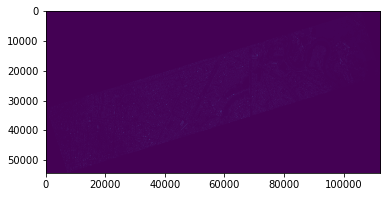

Out[60]: <AxesSubplot:>

In [ ]:
show(band1)

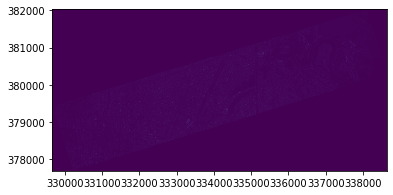

Out[9]: <AxesSubplot:>

In [ ]:
show(band1, transform=tif_image.transform, cmap='viridis')

Out[13]:

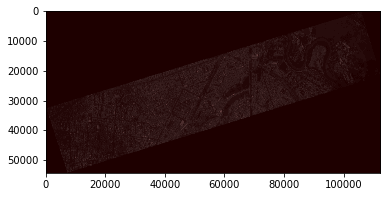

<matplotlib.image.AxesImage at 0x7f832195c1f0>

In [ ]:
pyplot.imshow(band1, cmap='pink')

#### Características  de las bandas

In [ ]:
# Promedio de los valores para la banda 1  calculados a lo largo de la columna (0)
np.mean(band1, axis=0)

Out[55]: array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Mostrar las sumas de las filas que sean mayor a 0
np.sum(band1, axis=1)[np.where(np.sum(band1, axis=1)>0)]

Out[56]: array([ 224, 246, 235, ..., 5388, 4185, 1396], dtype=uint64)

#### Leer segunda imagen TIF

In [ ]:
import rasterio
import numpy as np

In [ ]:
# Open image example
tif_image2 = rasterio.open('/mount_path/image.tif')

In [ ]:
tif_image2.transform*(0,0)

Out[160]: (357200.1349999999, 949926.0249999999)

In [ ]:
tif_image2.bounds

Out[158]: BoundingBox(left=357200.1349999999, bottom=942511.1349999999, right=360827.4449999999, top=949926.0249999999)

In [ ]:
#Leer una banda (Por ejemplo la 1) (tiempo requerido ~ 6 seg)
band1 = tif_image2.read(1)

In [ ]:
#Leer toda la imagen (tiempo requerido ~2 seg)/cache
bands = tif_image2.read()

In [ ]:
# Como acceder a las bandas
tif_image2.count, tif_image2.indexes

Out[5]: (3, (1, 2, 3))

In [ ]:
bands.shape

Out[8]: (3, 23919, 11701)

In [ ]:
# Visualización 
from rasterio.plot import show
from matplotlib import pyplot
from rasterio.plot import show_hist
import numpy as np

Out[21]:

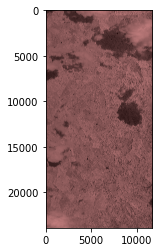

<matplotlib.image.AxesImage at 0x7ff091af6f40>

In [ ]:
pyplot.imshow(band1, cmap='pink')

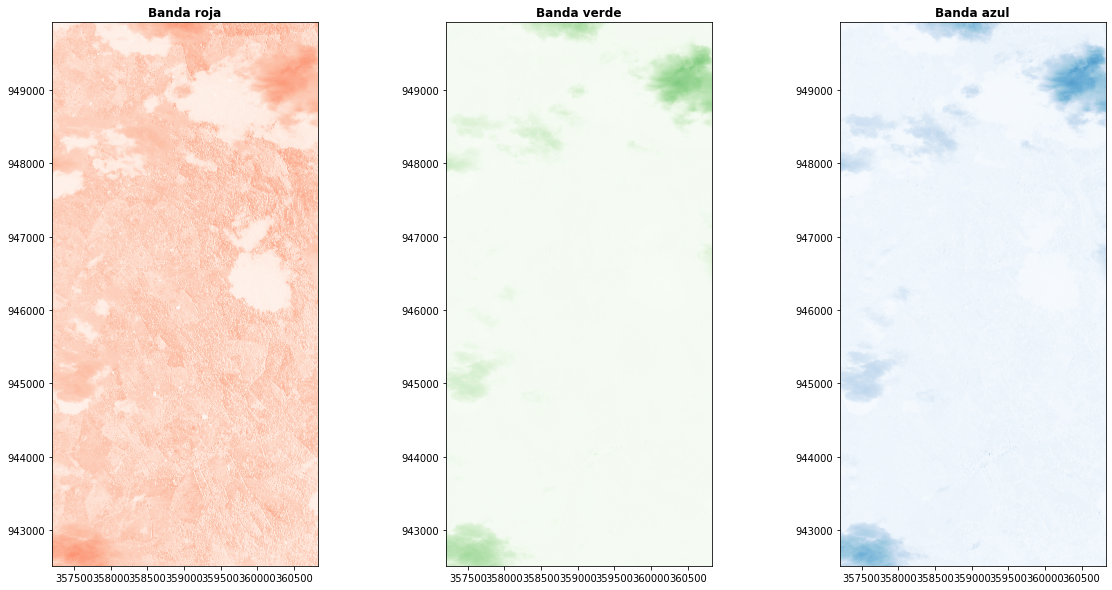

In [ ]:
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(20,10))
show((tif_image2, 1), ax=axr, cmap='Reds', title='Banda roja')
show((tif_image2, 2), ax=axg, cmap='Greens', title='Banda verde')
show((tif_image2, 3), ax=axb, cmap='Blues', title='Banda azul')
pyplot.show()

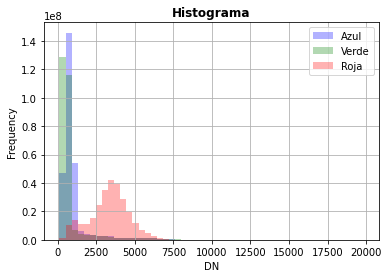

In [ ]:
#Mostra el histograma de las bandas
show_hist( tif_image2, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histograma", label=['Roja', 'Verde', 'Azul'])

In [ ]:
# tiempo para estas operaciones ~9 seg
# Escalar entre 0 y 255 ( con el max de todas las bandas)
norm = (bands * (255 / np.max(bands))).astype(np.uint8)
# Escalar entre 0 y 255 ( con el max de cada banda)
 #Código para escalar la imagen entre 0 y 255
bands.shape,bands_scaled.shape

Out[5]: ((3, 23919, 11701), (3, 23919, 11701))

Out[77]:

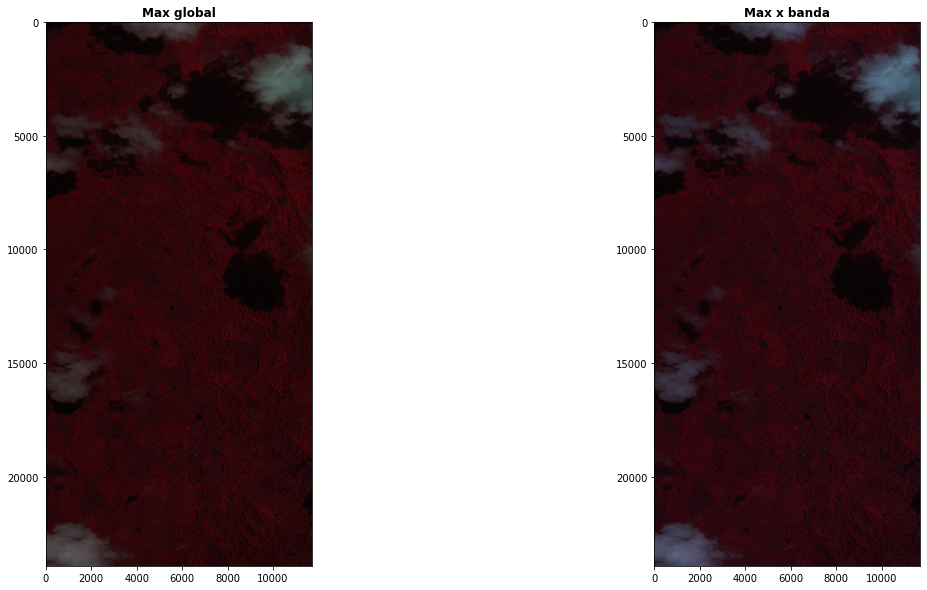

<AxesSubplot:title={'center':'Max x banda'}>

In [ ]:
fig, (axg, axl) = pyplot.subplots(1,2, figsize=(20,10))
show(norm, ax=axg, title='Max global')
show(bands_scaled, ax=axl, title='Max x banda')


#### Escribir raster

In [ ]:
import rasterio
import numpy as np

In [ ]:
with rasterio.open( './Local_PATH/<imageName>.<extensionImage>', 'w',
    driver='GTiff',
    height=bands_scaled.shape[1], width=bands_scaled.shape[2], count=bands_scaled.shape[0],
    dtype=bands_scaled.dtype, crs=tif_image2.crs, transform=tif_image2.transform) as image_transformed:
    
    image_transformed.write(bands_scaled) 

In [ ]:
%sh ls -lh /output_images/

total 801M
-rw-r--r-- 1 root root 801M Sep 20 12:03 IMG_RGB_transformed.tif

##### Copiar en el blob personal

In [ ]:
# Ejemplo de conexión
from azure.storage.blob import BlobServiceClient
from azure.storage.blob import BlobClient # también en ASINC
connection_string = "DefaultEndpointsProtocol=https;AccountName=<AccountStorageName>;AccountKey=<AccountStorageKey>"
# Importante, STR conexión, el nombre del contenedor, nombre del archivo como va a quedar guardado
blob = BlobClient.from_connection_string(conn_str=connection_string, container_name="<containerName>", blob_name = '<imageName>.<extensionImage>')



In [ ]:
# se abre el archivo creado anteriormente
with open("./Local_PATH/<imageName>.<extensionImage>", "rb") as data:
    blob.upload_blob(data)